In [19]:
import pandas as pd
from pandas.plotting import lag_plot


import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults


%matplotlib inline

In [2]:
# create the path for the file

myPath = os.path.join('/Users', 'Bryan', 'Documents', 'Programming',
                      'time_series_forecasting_with_python',
                      'UDEMY_TSA_FINAL','Data')

print(myPath)

os.chdir(myPath)

/Users/Bryan/Documents/Programming/time_series_forecasting_with_python/UDEMY_TSA_FINAL/Data


In [3]:
# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

In [5]:
df2 = pd.read_csv('DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

In [6]:
from pmdarima import auto_arima

In [8]:
# help(auto_arima)

In [14]:
aa = auto_arima(df2['Births'], start_p=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)

Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.025 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.126 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.514, BIC=2480.000, Fit time=0.438 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2461.874, BIC=2485.257, Fit time=0.549 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.188 seconds
Total fit time: 1.397 seconds


In [15]:
aa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Fri, 10 May 2019   AIC                           2460.154
Time:                        11:17:40   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [16]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], start_p=0, start_q=0, max_p=4, max_q=4, seasonal=True,
                         trace=True, m=12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=1034.078, BIC=1045.578, Fit time=0.574 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1033.479, BIC=1039.229, Fit time=0.026 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1022.316, BIC=1033.817, Fit time=0.454 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.904, BIC=1034.405, Fit time=0.526 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.343, BIC=1030.968, Fit time=0.145 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=1021.142, BIC=1035.518, Fit time=1.458 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1016.960, BIC=1034.212, Fit time=4.841 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1033.374, BIC=1047.750, Fit time=4.535 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1018.095, BIC=1038.222, Fit time=6.981 seconds
Fit ARIMA: order=(1, 1, 1) s

In [17]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(2, 1, 1, 12)   Log Likelihood                -502.480
Date:                            Fri, 10 May 2019   AIC                           1016.960
Time:                                    14:47:32   BIC                           1034.212
Sample:                                         0   HQIC                          1023.970
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0044      0.180      0.024      0.981      -0.349       0.358
ar.L1         -0.3776      0.077     -4.912      0.000      -0.528      -0.227
ar.S.L12       0.6885      0.142      4.845      0.000       0.410       0.967
ar.S.L24       0.3097      0.107      2.896      0.004       0.100       0.519
ma.S.L12      -0.9740      0.538     -1.811      0.070      -2.028       0.080
sigma2       113.2682     51.219      2.211      0.027      12.881     213.655
===================================================================================
Ljung-Box (Q):                       58.59   Jarque-Bera (JB):                12.02
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               2.70   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
df2 = df2[:120]

In [21]:
df1 = pd.read_csv('TradeInventories.csv', index_col='Date', parse_dates=True)
df1.index.frq='MS'

# ARMA

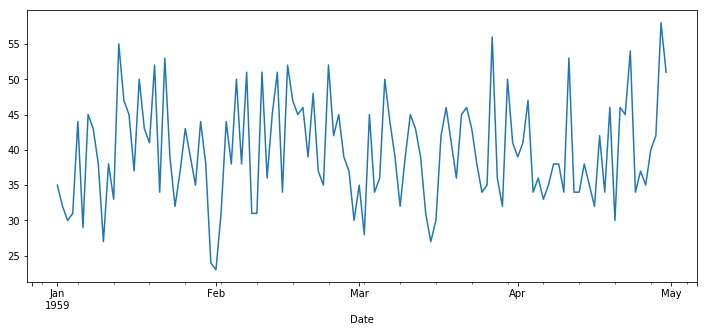

In [22]:
df2['Births'].plot(figsize=(12,5))

In [23]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [25]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [27]:
auto_arima(df2['Births'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 2)   Log Likelihood                -405.370
Method:                       css-mle   S.D. of innovations              6.991
Date:                Fri, 10 May 2019   AIC                            822.741
Time:                        14:57:39   BIC                            839.466
Sample:                             0   HQIC                           829.533
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8162      0.108    368.814      0.000      39.605      40.028
ar.L1.y        1.8568      0.081     22.923      0.000       1.698       2.016
ar.L2.y       -0.8814      0.073    -12.025      0.000      -1.025      -0.738
ma.L1.y       -1.8633      0.109    -17.120      0.000      -2.077      -1.650
ma.L2.y        0.8633      0.108      8.017      0.000       0.652       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0534           -0.1582j            1.0652           -0.0237
AR.2            1.0534           +0.1582j            1.0652            0.0237
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.1583           +0.0000j            1.1583            0.0000
-----------------------------------------------------------------------------
"""

In [28]:
train = df2.iloc[0:90]
test = df2.iloc[90:]

In [29]:
model = ARMA(train['Births'],order=(2,2))

In [30]:
results = model.fit()

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Fri, 10 May 2019   AIC                            627.809
Time:                        15:00:20   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [32]:
start = len(train)
end = len(train) + len(test) - 1

In [33]:
predictions = results.predict(start, end).rename('ARMA(2,2) Predictions')

In [34]:
predictions

1959-04-01    39.982227
1959-04-02    39.992609
1959-04-03    39.809831
1959-04-04    39.848171
1959-04-05    39.761537
1959-04-06    39.794253
1959-04-07    39.750499
1959-04-08    39.772832
1959-04-09    39.749659
1959-04-10    39.763666
1959-04-11    39.750990
1959-04-12    39.759431
1959-04-13    39.752353
1959-04-14    39.757336
1959-04-15    39.753334
1959-04-16    39.756243
1959-04-17    39.753963
1959-04-18    39.755650
1959-04-19    39.754346
1959-04-20    39.755322
1959-04-21    39.754574
1959-04-22    39.755137
1959-04-23    39.754707
1959-04-24    39.755031
1959-04-25    39.754784
1959-04-26    39.754971
1959-04-27    39.754829
1959-04-28    39.754937
1959-04-29    39.754855
1959-04-30    39.754917
Freq: D, Name: ARMA(2,2) Predictions, dtype: float64

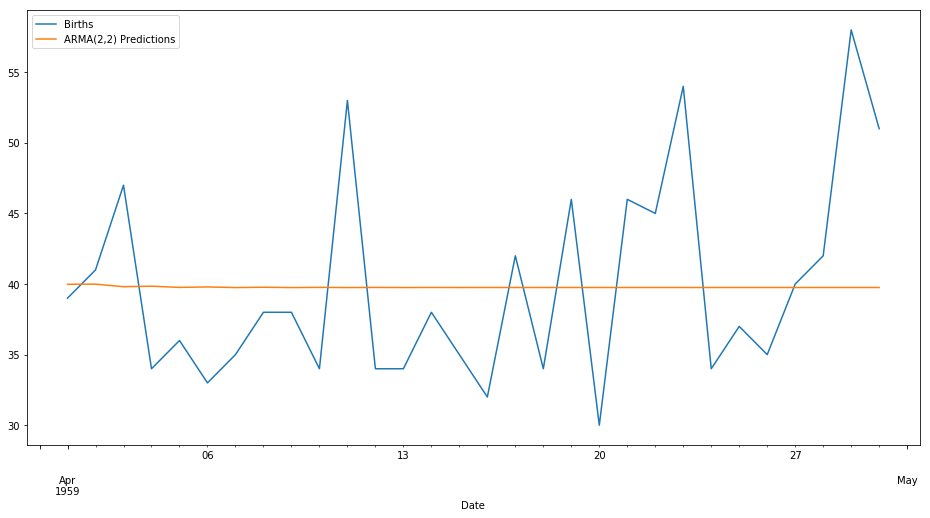

In [36]:
test['Births'].plot(figsize=(16,8), legend=True)
predictions.plot(legend=True)

In [37]:
test.mean()

Births    39.833333
dtype: float64

In [38]:
predictions.mean()

39.77743309152972

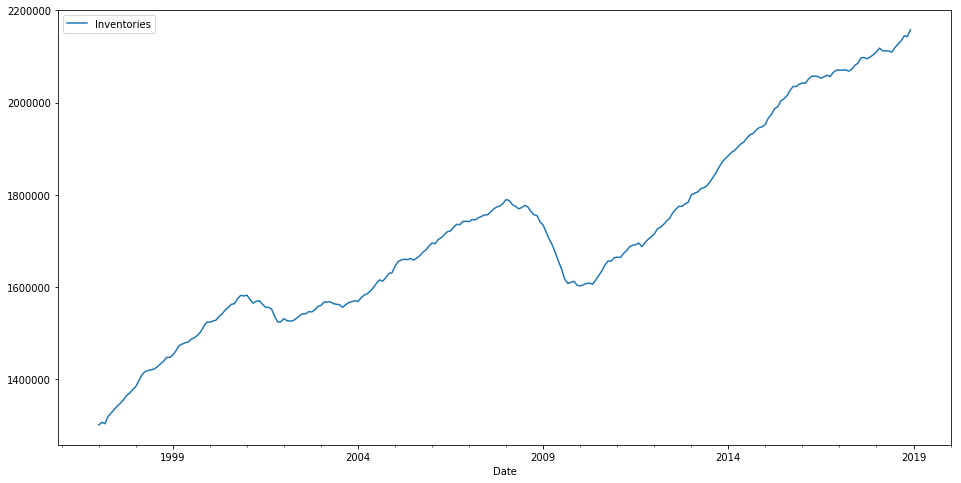

In [39]:
df1.plot(figsize=(16,8))

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

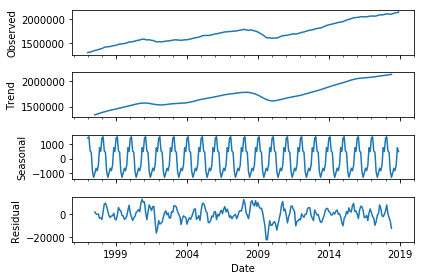

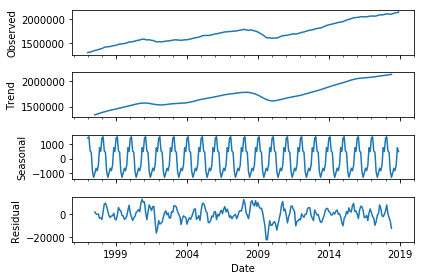

In [51]:
result = seasonal_decompose(df1['Inventories'], model='add')
result.plot()

In [52]:
auto_arima(df1['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.258
Date:                Fri, 10 May 2019   AIC                           5228.505
Time:                        15:31:12   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3473.3010   1313.686      2.644      0.009     898.524    6048.077
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

In [53]:
from statsmodels.tsa.statespace.tools import diff

In [54]:
df1['Diff_1'] = diff(df1['Inventories'], k_diff=1)

In [55]:
adf_test(df1['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


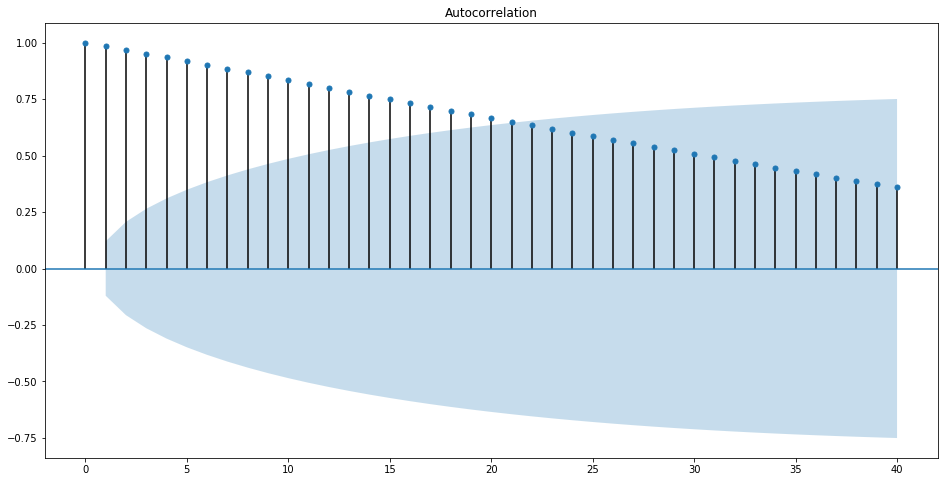

In [57]:
N, M = 16, 8
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(df1['Inventories'], lags=40, ax=ax)
plt.show()

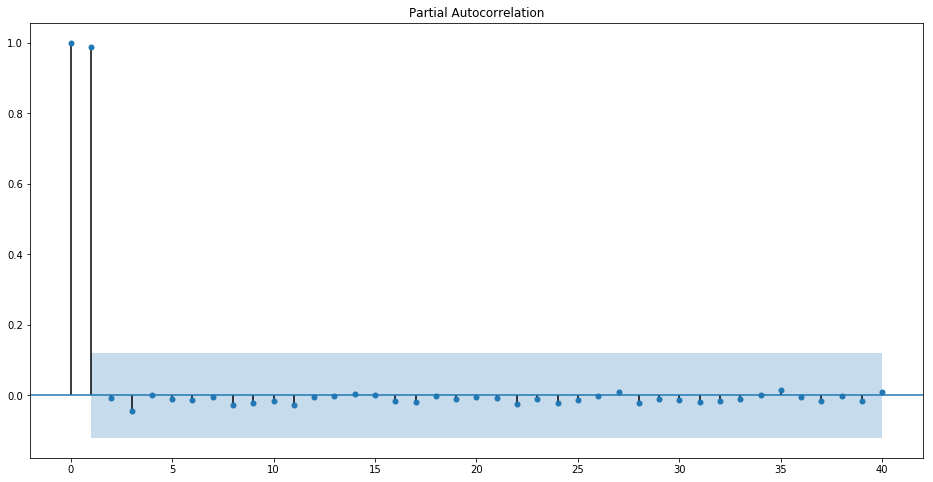

In [58]:
N, M = 16, 8
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(df1['Inventories'], lags=40, ax=ax)
plt.show()

In [59]:
stepwise_fit = auto_arima(df1['Inventories'], start_p=0, start_q=0, seasonal=False, max_p=2,max_q=2, trace=True)

stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.084 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.812, Fit time=0.089 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.100 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.526, BIC=5247.387, Fit time=0.244 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.155 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.183 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.886 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.258
Date:                Fri, 10 May 2019   AIC                           5228.505
Time:                        15:44:32   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3473.3010   1313.686      2.644      0.009     898.524    6048.077
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

In [60]:
len(df1)

264

In [61]:
train = df1.iloc[0:252]
test = df1.iloc[252:]

In [62]:
model = ARIMA(train['Inventories'], order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Fri, 10 May 2019   AIC                           4980.790
Time:                        15:48:07   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5697   1344.874      2.378      0.018     561.666    5833.473
ar.L1.D.Inventories     0.9026      0.039     23.010      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [74]:
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start=start, end=end, typ='levels').rename('ARIMA(1,1,1) Predictions')

In [75]:
predictions

2018-01-01    2.107148e+06
2018-02-01    2.110526e+06
2018-03-01    2.113886e+06
2018-04-01    2.117231e+06
2018-05-01    2.120561e+06
2018-06-01    2.123878e+06
2018-07-01    2.127184e+06
2018-08-01    2.130479e+06
2018-09-01    2.133764e+06
2018-10-01    2.137041e+06
2018-11-01    2.140311e+06
2018-12-01    2.143573e+06
Freq: MS, Name: ARIMA(1,1,1) Predictions, dtype: float64

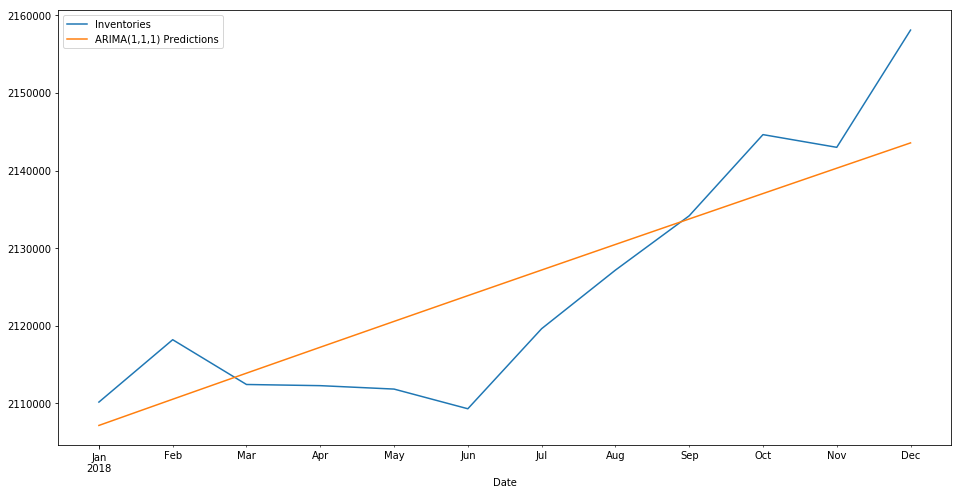

In [76]:
test['Inventories'].plot(figsize=(16,8), legend=True)
predictions.plot(legend=True)

In [77]:
from statsmodels.tools.eval_measures import rmse

In [78]:
error = rmse(test['Inventories'], predictions)
error

7789.597022970701

In [79]:
test['Inventories'].mean()

2125075.6666666665

In [81]:
percent = error/test['Inventories'].mean()
percent

0.0036655621939284838

# Forecast into the Future

In [82]:
model = ARIMA(df1['Inventories'], order=(1,1,1))
results = model.fit()

In [84]:
fcast = results.predict(start=len(df1), end=len(df1)+11,typ='levels').rename('ARIMA (1,1,1) Forecast')

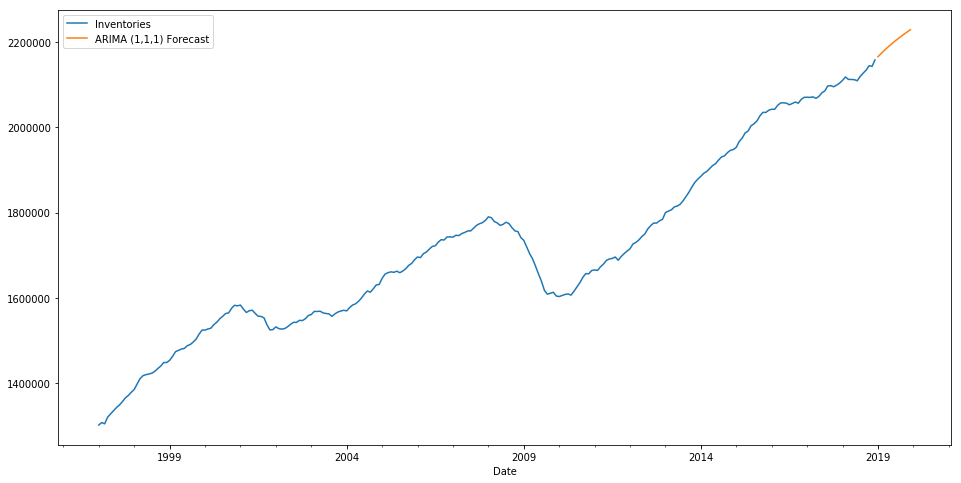

In [85]:
df1['Inventories'].plot(legend=True, figsize=(16,8))
fcast.plot(legend=True)

# Seasonal ARIMA

In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [87]:
df = pd.read_csv('co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [90]:
# alternate method
# dict(year=df['year'], month=df['month'], day=1)

df['Date'] = pd.to_datetime({'year':df['year'], 'month':df['month'], 'day':1})

In [91]:
df.head()

,year,month,decimal_date,average,interpolated,Date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
Date            729 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.2 KB


In [94]:
# need to make date the index
df = df.set_index('Date')

In [96]:
# for statsmodels
df.index.freq = 'MS'
df.head()

,year,month,decimal_date,average,interpolated
Date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


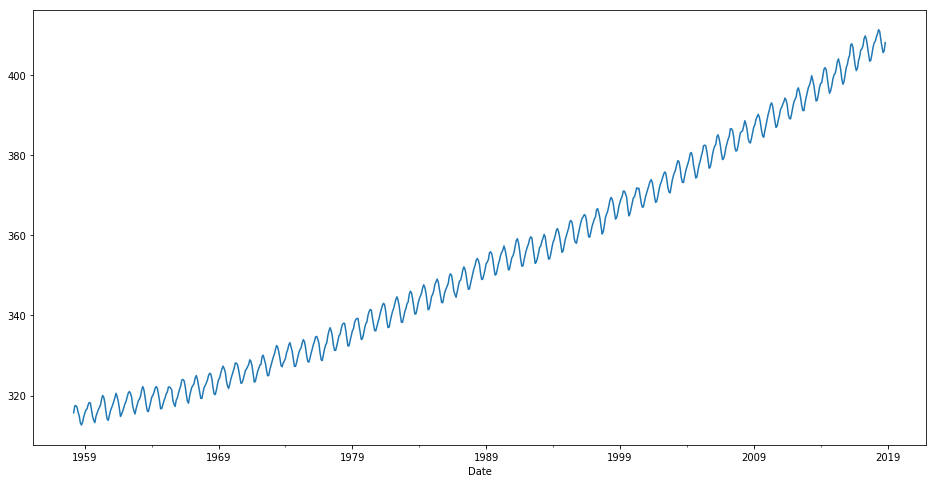

In [98]:
df['interpolated'].plot(figsize=(16,8))

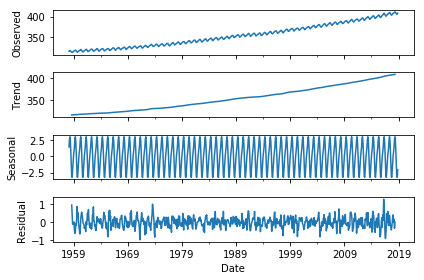

In [102]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

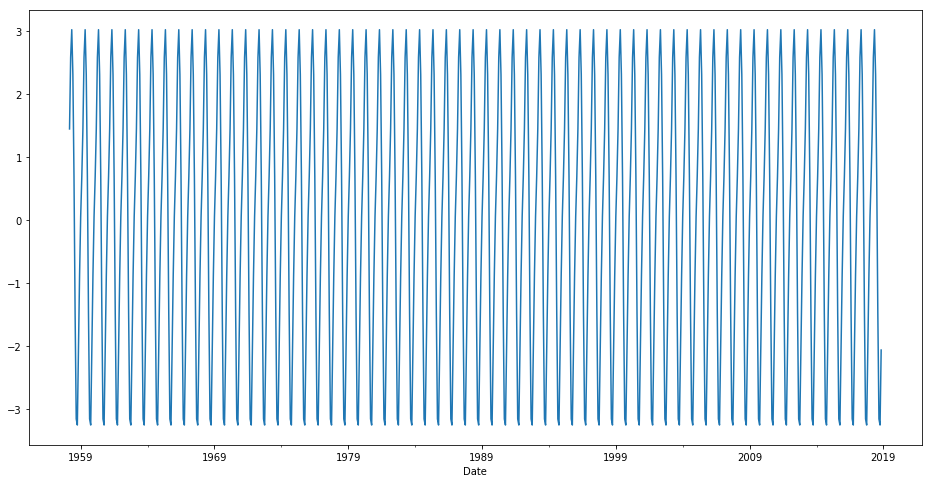

In [104]:
result.seasonal.plot(figsize=(16,8))

In [105]:
auto_arima(df['interpolated'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -207.827
Date:                            Fri, 10 May 2019   AIC                            425.655
Time:                                    16:18:11   BIC                            448.606
Sample:                                         0   HQIC                           434.511
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.001      1.422      0.155      -0.000       0.002
ma.L1         -0.3806      0.033    -11.406      0.000      -0.446      -0.315
ar.S.L12       0.9995      0.000   3502.729      0.000       0.999       1.000
ma.S.L12      -0.8738      0.020    -43.930      0.000      -0.913      -0.835
sigma2         0.0941      0.005     20.797      0.000       0.085       0.103
===================================================================================
Ljung-Box (Q):                       55.62   Jarque-Bera (JB):                 3.71
Prob(Q):                              0.05   Prob(JB):                         0.16
Heteroskedasticity (H):               1.11   Skew:                            -0.04
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
len(df)

729

In [109]:
train = df.iloc[0:717]
test = df.iloc[717:]

In [110]:
model = SARIMAX(train['interpolated'], order=(0,1,1), seasonal_order=(1,0,1,12))
results = model.fit()

In [111]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.148
Date:                            Fri, 10 May 2019   AIC                            418.297
Time:                                    16:20:43   BIC                            436.591
Sample:                                03-01-1958   HQIC                           425.361
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3716      0.034    -10.845      0.000      -0.439      -0.304
ar.S.L12       0.9997      0.000   3147.897      0.000       0.999       1.000
ma.S.L12      -0.8645      0.023    -37.700      0.000      -0.909      -0.820
sigma2         0.0960      0.005     20.363      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.94   Jarque-Bera (JB):                 3.79
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
start = len(train)
end = len(train) + len(test) -1

In [113]:
predictions = results.predict(start,end,typ='levels').rename('SARIMA Predictions')

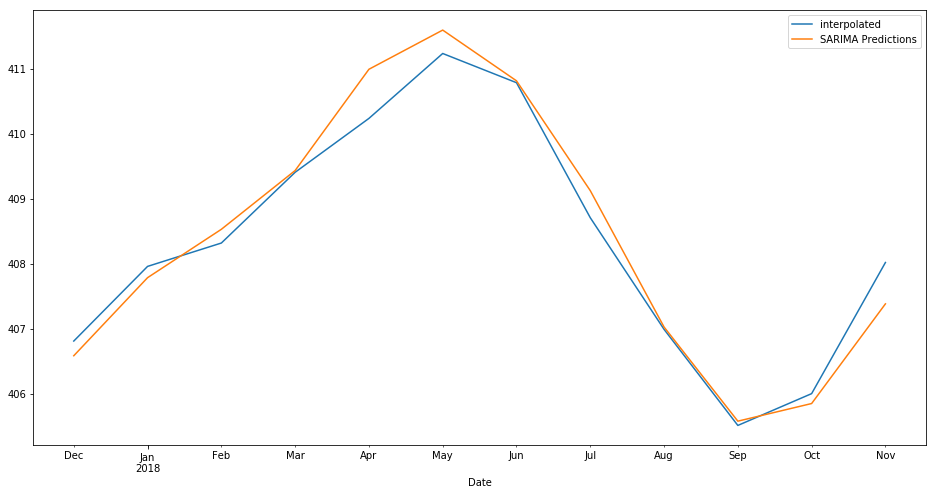

In [115]:
test['interpolated'].plot(figsize=(16,8), legend=True)
predictions.plot(legend=True)

In [117]:
error = rmse(test['interpolated'], predictions)
error

0.3463254579073349

In [118]:
test['interpolated'].mean()

408.3333333333333

In [119]:
percent = error/test['interpolated'].mean()
percent

0.0008481439785485753

# Forecasting into the Unknown Future

In [121]:
model = SARIMAX(df['interpolated'], order=(0,1,1), seasonal_order=(1,0,1,12))
results = model.fit()

In [122]:
fcast = results.predict(len(df), len(df)+11, typ='levels').rename('SARIMA Forecast')
fcast

2018-12-01    409.266541
2019-01-01    410.461533
2019-02-01    411.153473
2019-03-01    412.083712
2019-04-01    413.544922
2019-05-01    414.202472
2019-06-01    413.465576
2019-07-01    411.721020
2019-08-01    409.672962
2019-09-01    408.219558
2019-10-01    408.521785
2019-11-01    410.122983
Freq: MS, Name: SARIMA Forecast, dtype: float64

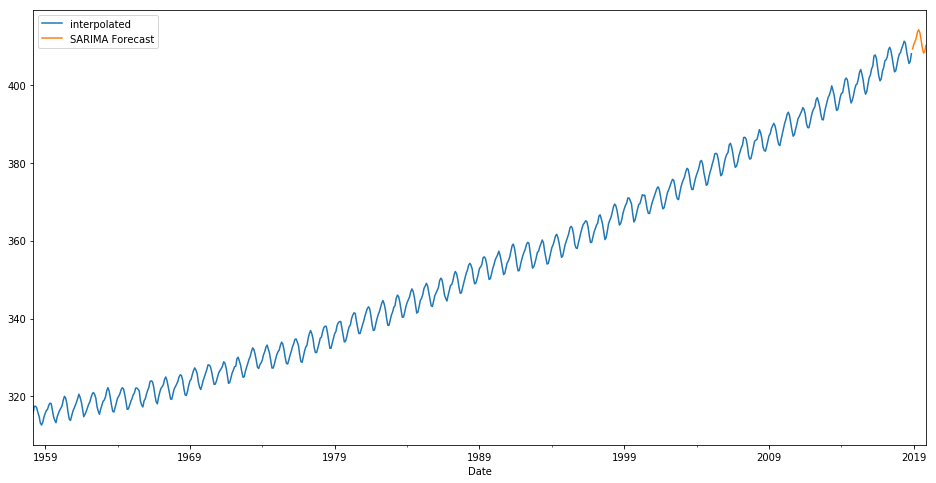

In [125]:
ax = df['interpolated'].plot(figsize=(16,8), legend=True)
ax1 = fcast.plot(legend=True)
ax.autoscale(axis = 'x', tight = True)